<a href="https://colab.research.google.com/github/arjoca/RHDocentes/blob/main/Gini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/oliviaguest/gini

In [1]:
import numpy as np
import pandas as pd

In [10]:
s1 = pd.Series(np.random.randn(7))
s2 = pd.Series(np.ones(7))
s3 = pd.Series(np.zeros(7))
s3[3] = 1

In [11]:
s3

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
5    0.0
6    0.0
dtype: float64

In [4]:
def gini_coefficient(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

In [14]:
gini_coefficient(s3)

0.8571428571428571

https://github.com/oliviaguest/gini/blob/master/gini.py

In [15]:
import numpy as np

def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [16]:
a = np.zeros((1000))
a[0] = 1.0

In [17]:
s = np.random.uniform(-1,0,1000)

In [18]:
b = np.ones((1000))

In [19]:
gini(a)

0.998900109989001

In [20]:
gini(s)

0.3199199190413252

In [21]:
gini(b)

0.0

In [22]:
gini_coefficient(b)

0.0

In [29]:
gini(s3.values)

0.8571422571432772

(array([23., 21., 21., 28., 17., 21., 24., 24., 35., 31., 28., 25., 31.,
        21., 20., 26., 27., 21., 24., 32.]),
 array([3.73693316e-04, 5.02987002e-02, 1.00223707e-01, 1.50148714e-01,
        2.00073721e-01, 2.49998728e-01, 2.99923735e-01, 3.49848742e-01,
        3.99773748e-01, 4.49698755e-01, 4.99623762e-01, 5.49548769e-01,
        5.99473776e-01, 6.49398783e-01, 6.99323790e-01, 7.49248797e-01,
        7.99173804e-01, 8.49098811e-01, 8.99023817e-01, 9.48948824e-01,
        9.98873831e-01]),
 <a list of 20 Patch objects>)

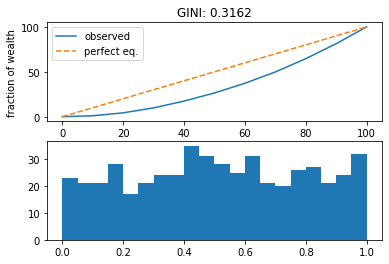

In [38]:
def G(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

v = np.random.rand(500)
bins, result, gini_val = G(v)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(bins, result, label="observed")
plt.plot(bins, bins, '--', label="perfect eq.")
plt.xlabel("fraction of population")
plt.ylabel("fraction of wealth")
plt.title("GINI: %.4f" %(gini_val))
plt.legend()
plt.subplot(2, 1, 2)
plt.hist(v, bins=20)

In [32]:
import matplotlib.pyplot as plt

In [35]:
np.percentile??

In [39]:
def gini2(x):
    # (Warning: This is a concise implementation, but it is O(n**2)
    # in time and memory, where n = len(x).  *Don't* pass in huge
    # samples!)

    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g

In [46]:
gini2(b)

0.0